In [1]:
using Base.Threads
using Distributions
using StatsPlots
default(fmt=:png, titlefontsize=12)

In [2]:
function sim_binomial(n, k, ps; L=10^5)
    lik = similar(ps)
    @threads for i in eachindex(ps)
        bin = Binomial(n, ps[i])
        lik[i] = mean(rand(bin) == k for _ in 1:L) # likelihood
    end
    lik
end

function plot_sim_binomial(n, k, ps; L=10^5, kwargs...)
    @time lik = sim_binomial(n, k, ps; L)
    plot(ps, lik; label="", kwargs...)
end

plot_sim_binomial (generic function with 1 method)

  6.523133 seconds (399.25 k allocations: 21.386 MiB, 2.99% compilation time)


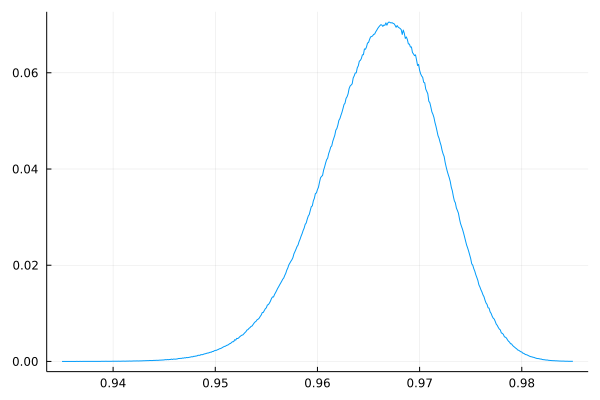

In [3]:
plot_sim_binomial(1000, 967, 0.935:0.0001:0.985; L=10^6)

  3.957053 seconds (103 allocations: 10.547 KiB)


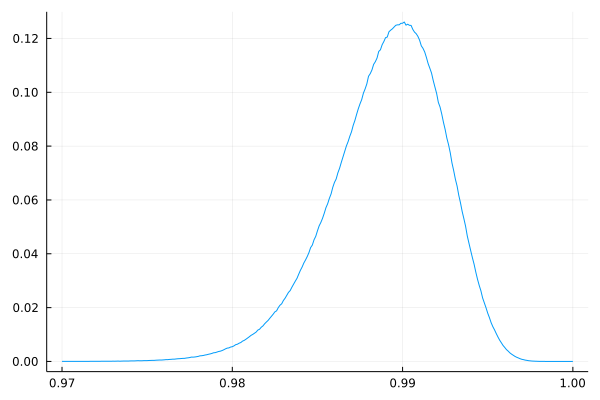

In [4]:
plot_sim_binomial(1000, 990, 0.97:0.0001:1; L=10^6)

  2.673064 seconds (96 allocations: 9.719 KiB)


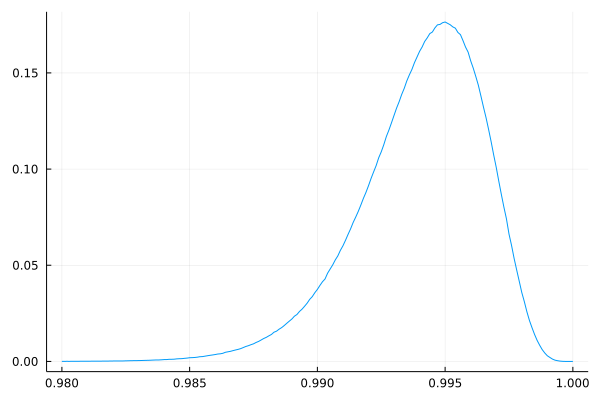

In [5]:
plot_sim_binomial(1000, 995, 0.98:0.0001:1; L=10^6)

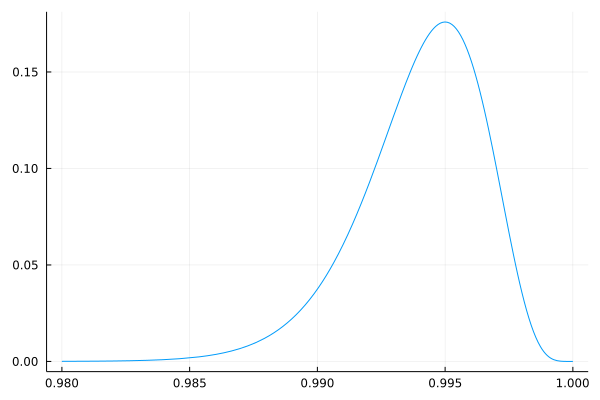

In [6]:
plot(p -> pdf(Binomial(1000, p), 995), 0.98, 1; label="")

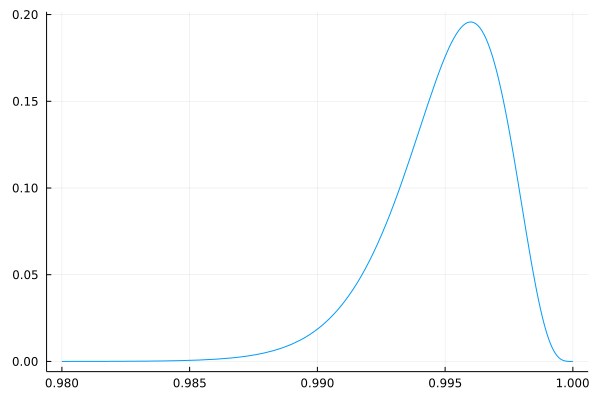

In [7]:
plot(p -> pdf(Binomial(1000, p), 996), 0.98, 1; label="")

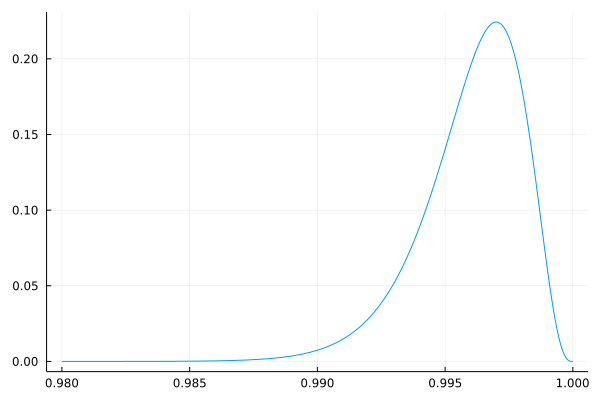

In [8]:
plot(p -> pdf(Binomial(1000, p), 997), 0.98, 1; label="")

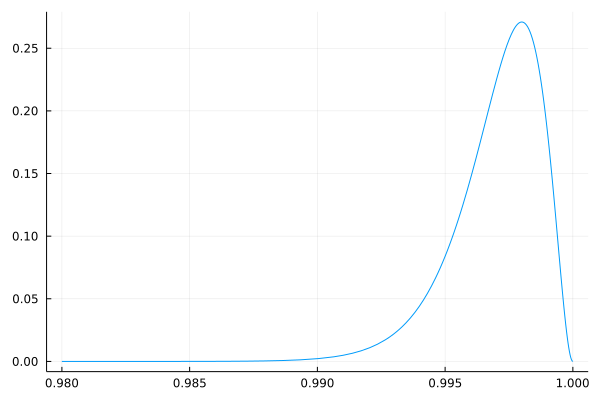

In [9]:
plot(p -> pdf(Binomial(1000, p), 998), 0.98, 1; label="")

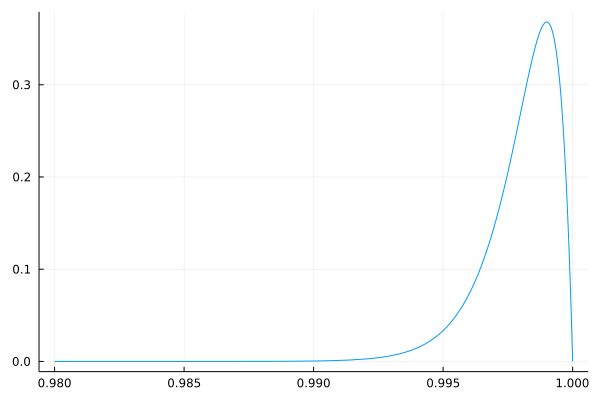

In [10]:
plot(p -> pdf(Binomial(1000, p), 999), 0.98, 1; label="")

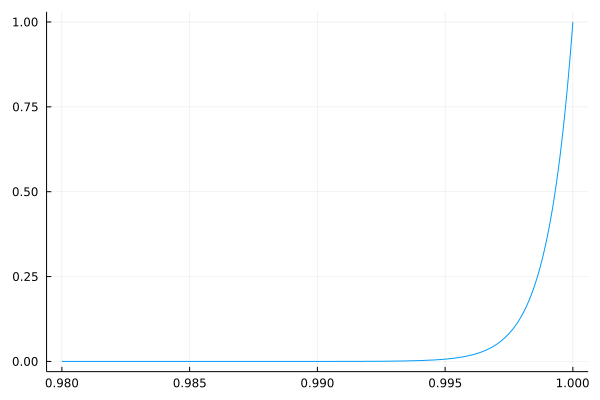

In [11]:
plot(p -> pdf(Binomial(1000, p), 1000), 0.98, 1; label="")